In [1]:
# Carga el dataset 'California housing' y realiza un modelo de regresión Ridge de la mediana de los valores de las casas (Y-respuesta) con las
# variables restantes, numéricas y categóricas, del dataset.
# a) Con el hiperparámetros de encogimiento alpha = 1.
# b) Con el hiperparámetros de encogimiento alpha = 10^4.
# c) Compara ambos modelos con el modelo de regresión lineal múltiple. ¿Qué se observa?

In [18]:
# Apartado a)
# Se repite el procedimiento seguido en el ejercicio 5.2., en el que se construye el modelo con todas las variables realizando imputación y 
# estandarización

import pandas as pd
from sklearn.impute import SimpleImputer # Para imputación
from sklearn.preprocessing import StandardScaler # Para estandarización
from sklearn.pipeline import Pipeline # Para combinar imputación y estandarización
from sklearn.preprocessing import OneHotEncoder # Para crear variable indicadora
from sklearn.compose import ColumnTransformer # Para considerar la variable categórica en la imputación y estandarización

housing = pd.read_csv('datasets/housing/housing.csv')

# Variable respuesta
respuesta = housing['median_house_value'].copy()
housing = housing.drop('median_house_value', axis=1)

# Variables numéricas
housing_num = housing.drop('ocean_proximity', axis=1)

# Imputación y estandarización de las variables numéricas
num_pipeline = Pipeline([
    ('imputador', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num) # Se aplica pipeline

# Nombre de variables numéricas
num_attribs = list(housing_num)

# Nombre de variable categórica
cat_attribs = ['ocean_proximity']

# Se añade la variable categórica al proceso de imputación y estandarización. Se añade una de las variables categóricas en el intercepto 
# (drop='first')
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(drop='first'), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing) # Se aplica pipeline
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
# Ya estamos en condiciones de realizar la regresión Ridge. Se requiere importar la clase Ridge de la librería 'sklearn'.
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='auto')
ridge_reg.fit(housing_prepared, respuesta)

print('Coeficientes del modelo de regresión Ridge:')
print('Intercepto:', ridge_reg.intercept_)
print('Beta:', ridge_reg.coef_)

Coeficientes del modelo de regresión Ridge:
Intercepto: 219251.8547047686
Beta: [-52925.7575442  -53744.69781116  13319.85812079 -10293.66412867
  29937.78985234 -44479.43818497  29692.21439608  73624.96037269
 -39789.87191589 130031.63921427  -3697.62935336   4750.43033774]


In [24]:
# alpha = 1 no aplica apenas penalización y los resultados obtenidos son prácticamente los mismos que se obtenían en el ejercicio 5.2.

In [26]:
# Apartado b)
# Se toma ahora alpha = 10^4.

ridge_reg_b = Ridge(alpha=1e4, solver='auto')
ridge_reg_b.fit(housing_prepared, respuesta)
print('Coeficientes del modelo de regresión Ridge:')
print('Intercepto:', ridge_reg_b.intercept_)
print('Beta:', ridge_reg_b.coef_)

Coeficientes del modelo de regresión Ridge:
Intercepto: 213248.32449961072
Beta: [ -9760.89761151 -12228.34267466  11199.36514172   5640.33695302
   4851.91951441  -9762.34854409   5734.63871066  50971.33381983
 -24316.41748776     89.44198348   5253.33235919   5765.58163202]


In [28]:
# Se observa que el intercepto se mantiene más o menos en el mismo valor y que la mayoría de coeficientes disminuyen, aunque unos lo hacen más que
# otros.

In [42]:
# Apartado c)
# Comparamos los resultados anteriores con aquellos proporcionados por el modelo de regresión lineal múltiple no penalizado.
# Para ello, empezamos construyendo el modelo sin penalizar. La comparación se muestra en un diagrama de barras.

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Modelo sin penalizar
lm = LinearRegression()
lm.fit(housing_prepared, respuesta)

# Representación gráfica
barWidth = 0.25 # Ancho barras
r1 = np.arange(len(lm.coef_)) # Array [0, 1, 2, ..., len(lm.coef_)-1] para ubicar las barras en el diagrama
r2 = [x + barWidth for x in r1] # Ubicación de las barras correspondientes a la regresión Ridge_a
r3 = [x + barWidth for x in r2] # Ubicación de las barras correspondientes a la regresión Ridge_b
print(r1)
print(r2)
print(r3)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0.25, 1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25, 10.25, 11.25]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]


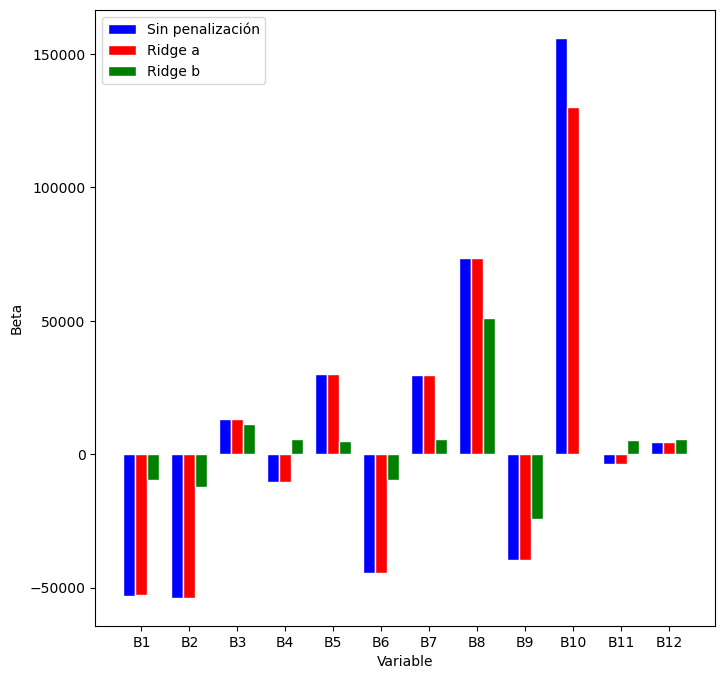

In [44]:
fig = plt.figure(figsize=(8,8))
plt.bar(r1, lm.coef_, color='blue', width=barWidth, edgecolor='white', label='Sin penalización')
plt.bar(r2, ridge_reg.coef_, color='red', width=barWidth, edgecolor='white', label='Ridge a')
plt.bar(r3, ridge_reg_b.coef_, color='green', width=barWidth, edgecolor='white', label='Ridge b')
plt.xticks([x + barWidth for x in range(len(lm.coef_))],
          ['B'+str(i) for i in range(1,13)])
plt.legend()
plt.xlabel('Variable')
plt.ylabel('Beta')
plt.show(fig)